# **Exploratory Data Analysis**

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## **Load Data**

### **Perkenalan Dataset**

**Sumber Dataset**:

- Dataset diperoleh dari data pengumpulan sensor IoT yang diunduh dari platform IoT Cloud Thingspeak

In [ ]:
df = pd.read_csv('ENV_data_2025-06-21_to_2025-07-28.csv')

df

,created_at,Temperature,Humidity,PM2.5,PM10,CO,CO2
0,2025-06-21 07:00:15+07:00,24.8,84.3,52.7,72.5,0.59860,403.34171
1,2025-06-21 07:01:04+07:00,24.8,84.1,50.4,66.7,0.56109,403.40472
2,2025-06-21 07:01:53+07:00,24.8,84.0,51.7,74.0,0.54466,403.36261
3,2025-06-21 07:02:43+07:00,24.9,83.6,49.7,65.9,0.55447,403.30020
4,2025-06-21 07:03:32+07:00,24.9,83.3,51.6,72.7,0.57113,403.29333
...,...,...,...,...,...,...,...
62420,2025-07-28 06:55:48+07:00,25.7,77.3,60.4,89.8,8.19941,411.28958
62421,2025-07-28 06:56:41+07:00,25.8,77.0,59.8,88.2,8.21437,411.35828
62422,2025-07-28 06:57:35+07:00,25.8,76.8,61.0,92.7,8.12498,411.18726
62423,2025-07-28 06:58:24+07:00,25.8,76.5,60.2,90.9,8.15468,411.41003


In [3]:
df = df[(df['CO2'] >= 400) & (df['CO'] <= 100) & (df['CO'] > 0.1)]

In [4]:
df.isna().sum()

created_at     0
Temperature    0
Humidity       0
PM2.5          0
PM10           0
CO             0
CO2            0
dtype: int64

## **Exploratory Data Analysis**

In [5]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [6]:
df = df.set_index('created_at')

In [7]:
df = df.resample('3min').mean()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17760 entries, 2025-06-21 07:00:00+07:00 to 2025-07-28 06:57:00+07:00
Freq: 3min
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  17684 non-null  float64
 1   Humidity     17684 non-null  float64
 2   PM2.5        17684 non-null  float64
 3   PM10         17684 non-null  float64
 4   CO           17684 non-null  float64
 5   CO2          17684 non-null  float64
dtypes: float64(6)
memory usage: 971.2 KB


In [9]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,CO,CO2
count,17684.000000,17684.000000,17684.000000,17684.000000,17684.000000,17684.000000
mean,26.486650,74.627187,43.358724,62.878800,1.763494,404.582281
std,1.871927,9.640687,27.033572,40.685631,1.259355,1.692494
min,22.233333,42.050000,2.100000,3.866667,0.319727,401.704317
25%,25.000000,68.350000,23.031250,31.050000,0.826900,403.319341
50%,26.225000,76.166667,37.250000,53.866667,1.369671,404.235990
75%,28.000000,82.200000,57.525000,84.406250,2.392759,405.634326
max,30.950000,91.733333,219.375005,342.000000,11.001617,413.165273


In [10]:
df

,Temperature,Humidity,PM2.5,PM10,CO,CO2
created_at,,,,,,
2025-06-21 07:00:00+07:00,24.825000,84.000000,51.125000,69.775000,0.564705,403.352310
2025-06-21 07:03:00+07:00,24.900000,83.200000,49.533333,68.800000,0.564447,403.293330
2025-06-21 07:06:00+07:00,24.925000,82.750000,50.475000,68.875000,0.545560,403.244147
2025-06-21 07:09:00+07:00,25.075000,81.900000,55.525000,74.900000,0.553152,403.269515
2025-06-21 07:12:00+07:00,25.066667,81.833333,53.966667,70.733333,0.548513,403.360290
...,...,...,...,...,...,...
2025-07-28 06:45:00+07:00,25.300000,77.933333,54.100000,84.533333,7.335530,410.342427
2025-07-28 06:48:00+07:00,25.400000,77.875000,57.350000,88.200000,7.334730,410.614937
2025-07-28 06:51:00+07:00,25.566667,77.633333,61.566667,91.766667,7.700117,410.698927


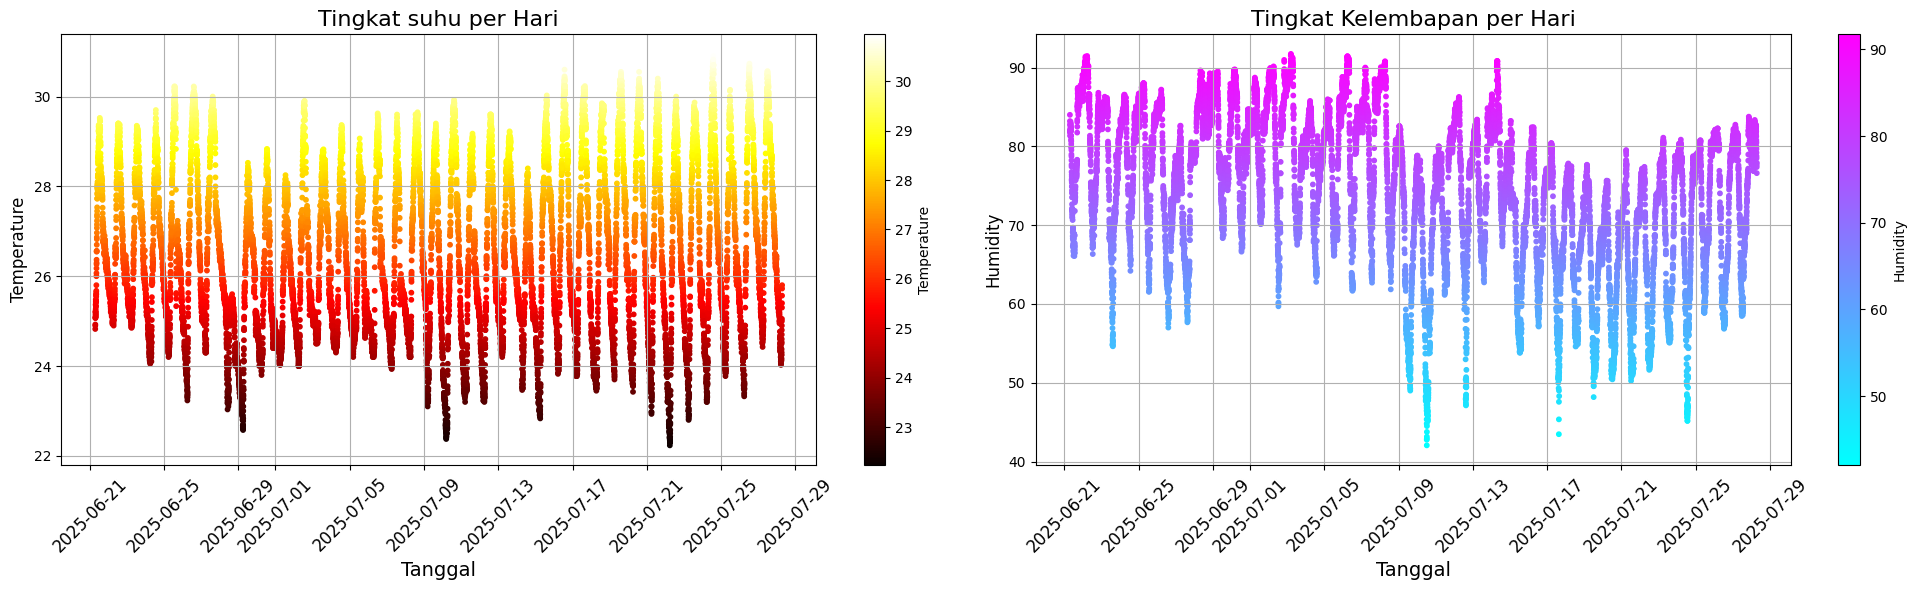

In [11]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.scatter(df.index, df['Temperature'], c=df['Temperature'], cmap='hot', s=10)
plt.title('Tingkat suhu per Hari', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Temperature', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.colorbar(label='Temperature')
plt.grid(True)

plt.subplot(122)
plt.scatter(df.index, df['Humidity'], c=df['Humidity'], cmap='cool', s=10)
plt.title('Tingkat Kelembapan per Hari', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Humidity', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.colorbar(label='Humidity')
plt.grid(True)

plt.tight_layout()
plt.show()

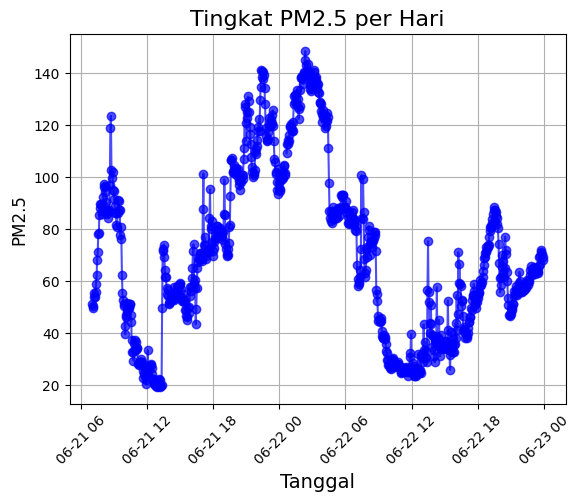

In [12]:
plt.plot(df['PM2.5']['2025-06-21':'2025-06-22'], marker='o', color='blue', alpha=0.7)
plt.title('Tingkat PM2.5 per Hari', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('PM2.5', fontsize=12)
plt.tick_params(axis='x', rotation=45)
plt.grid(True)

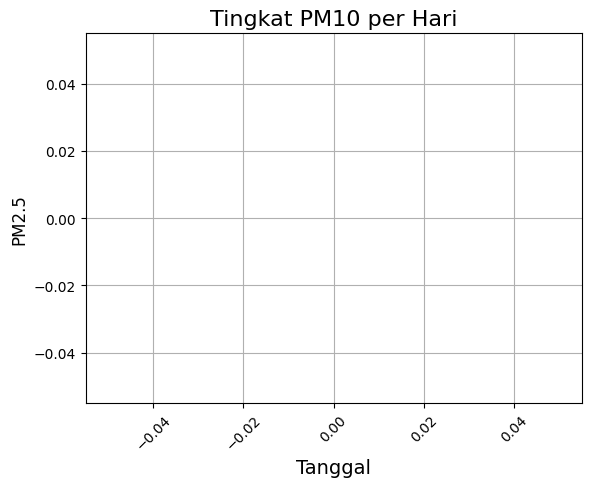

In [13]:
plt.plot(df['PM10']['2025-06-21':'2025-06-2'], marker='o', color='blue', alpha=0.7)
plt.title('Tingkat PM10 per Hari', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('PM2.5', fontsize=12)
plt.tick_params(axis='x', rotation=45)
plt.grid(True)

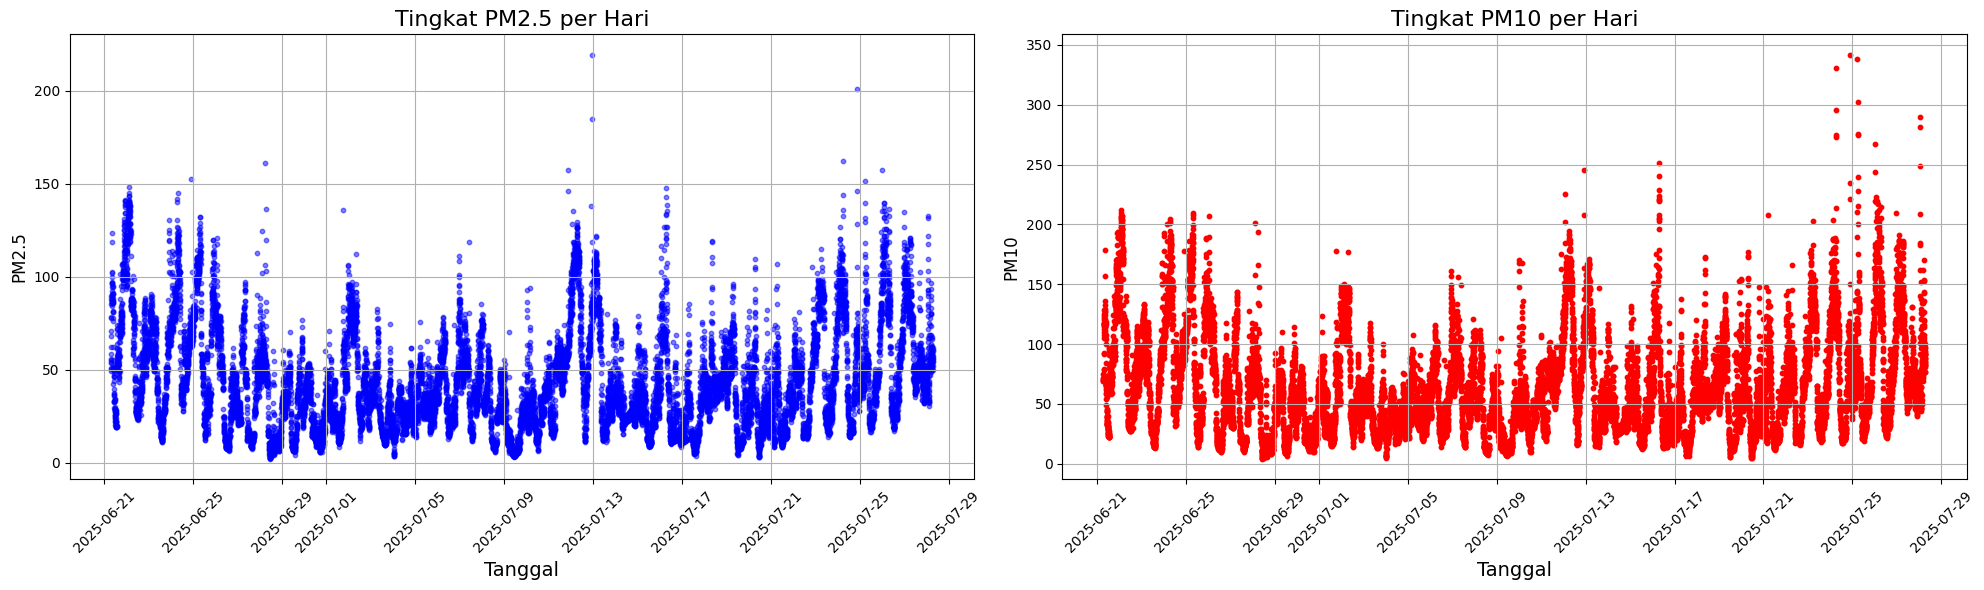

In [14]:
plt.figure(figsize=(20, 6))

ax1 = plt.subplot(121)
ax1.scatter(df.index, df['PM2.5'], s=10, c='blue', alpha=0.5)
ax1.set_title('Tingkat PM2.5 per Hari', fontsize=16)
ax1.set_xlabel('Tanggal', fontsize=14)
ax1.set_ylabel('PM2.5', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

ax2 = plt.subplot(122)
ax2.scatter(df.index, df['PM10'], s=10, c='red')
ax2.set_title('Tingkat PM10 per Hari', fontsize=16)
ax2.set_xlabel('Tanggal', fontsize=14)
ax2.set_ylabel('PM10', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True)


plt.tight_layout()
plt.show()

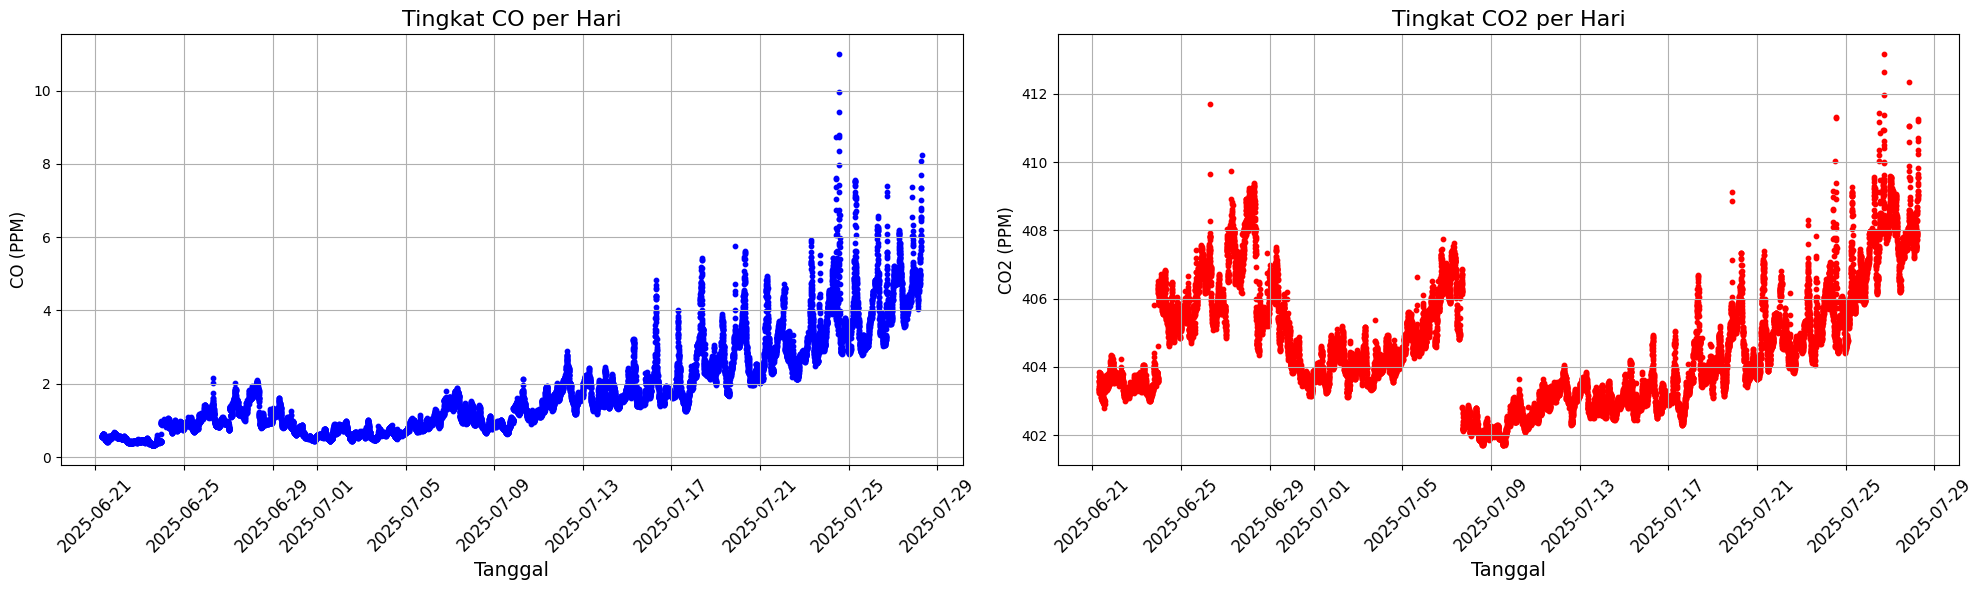

In [15]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.scatter(df.index, df['CO'], s=10, color='blue')
plt.title('Tingkat CO per Hari', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('CO (PPM)', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True)

plt.subplot(122)
plt.scatter(df.index, df['CO2'], s=10, color='red')
plt.title('Tingkat CO2 per Hari', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('CO2 (PPM)', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

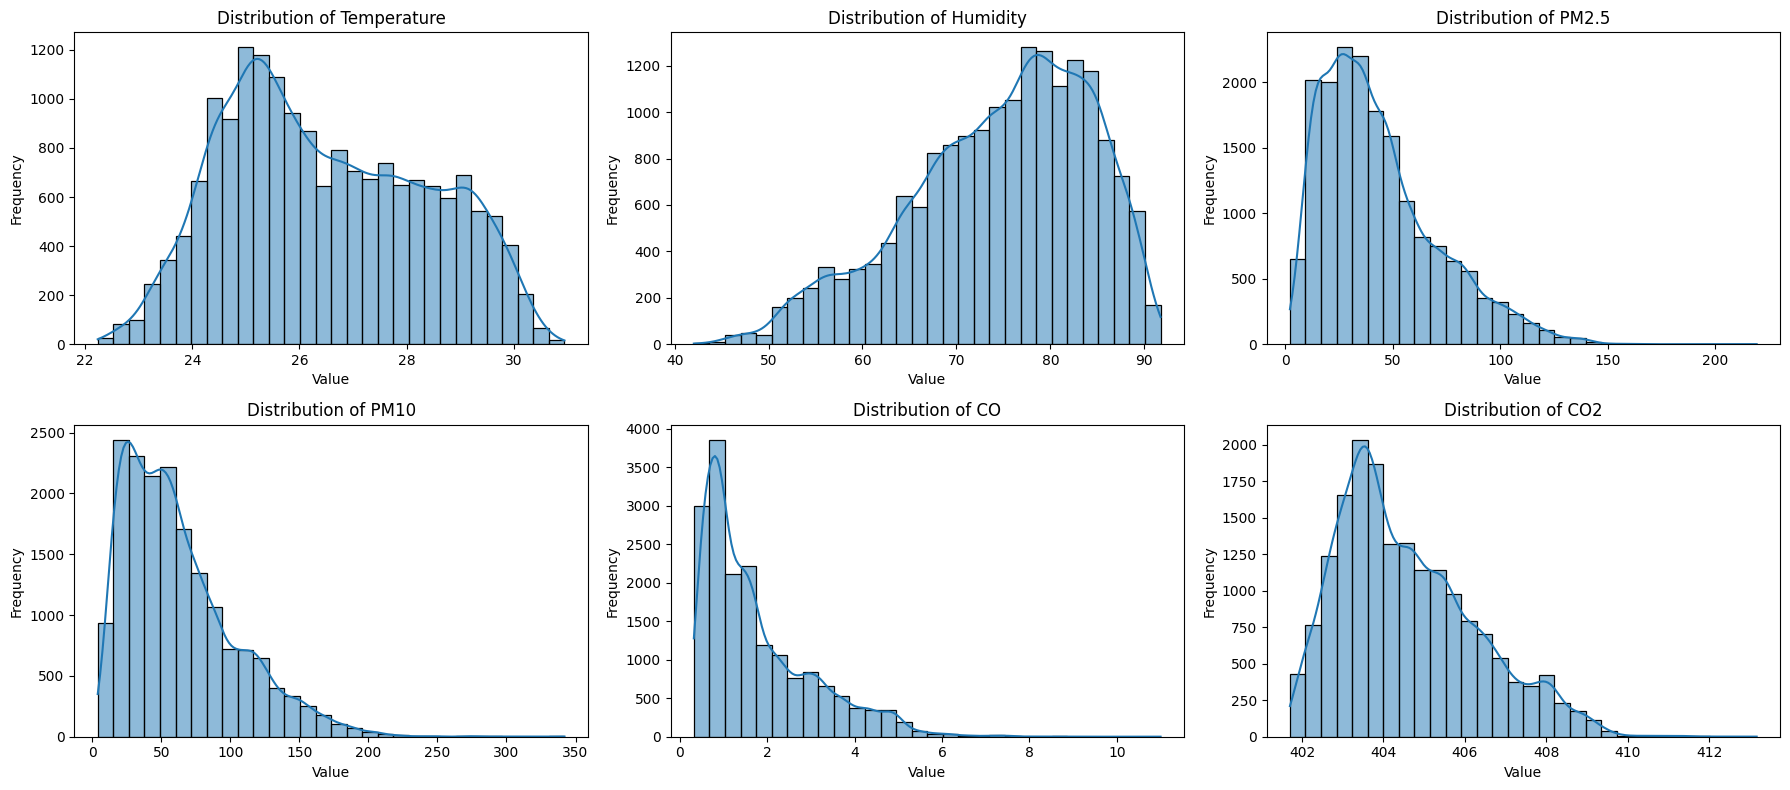

In [16]:
# Daftar nama kolom
columns_to_plot = df.columns.tolist()
 
# Menentukan jumlah baris dan kolom untuk subplot()
n_cols = 3  # Jumlah kolom pada grid subplot
n_rows = -(-len(columns_to_plot) // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat kanvas utama
plt.figure(figsize=(n_cols * 6, n_rows * 4))

# Membuat histogram untuk setiap kolom
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)  # Menentukan posisi subplot
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Menyesuaikan tata letak dan menampilkan grafik
plt.tight_layout()
plt.show()

In [17]:
df.skew()

Temperature    0.227869
Humidity      -0.588163
PM2.5          1.014194
PM10           1.122475
CO             1.339597
CO2            0.735627
dtype: float64

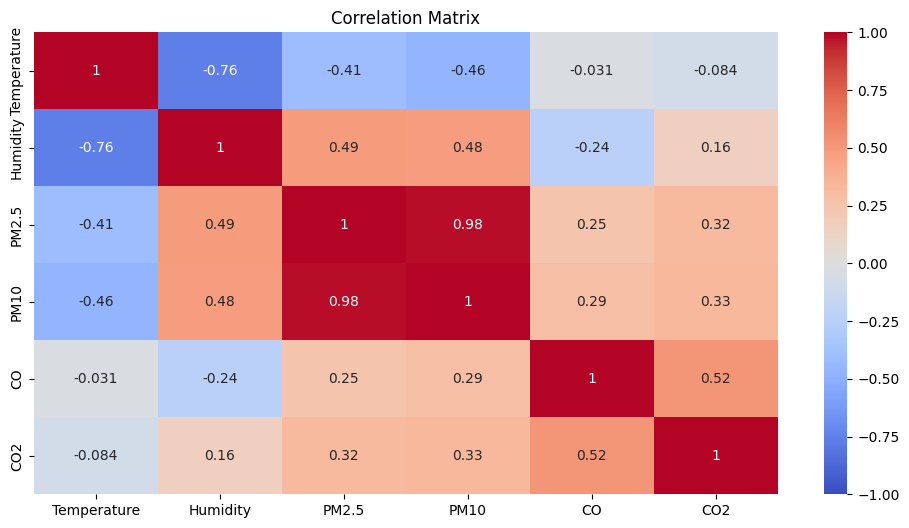

In [18]:
# Visualisasi korelasi antar variabel
plt.figure(figsize=(12, 6))

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

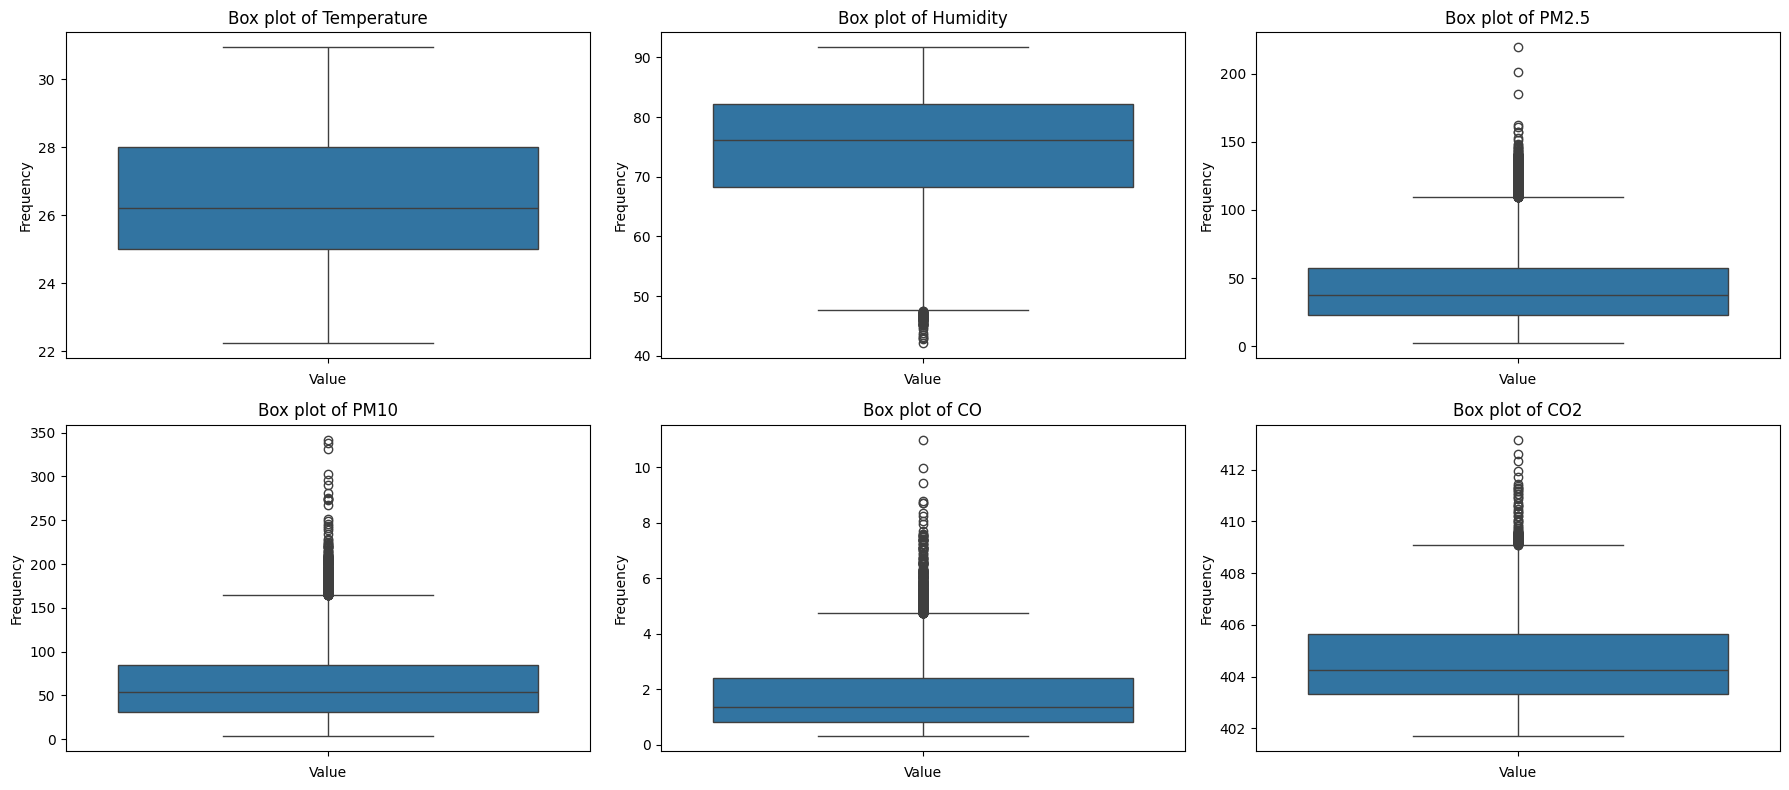

In [19]:
# Daftar nama kolom
columns_to_plot = df.columns.tolist()
 
# Menentukan jumlah baris dan kolom untuk subplot()
n_cols = 3  # Jumlah kolom pada grid subplot
n_rows = -(-len(columns_to_plot) // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat kanvas utama
plt.figure(figsize=(n_cols * 6, n_rows * 4))

# Membuat histogram untuk setiap kolom
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)  # Menentukan posisi subplot
    sns.boxplot(df[column])
    plt.title(f'Box plot of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Menyesuaikan tata letak dan menampilkan grafik
plt.tight_layout()
plt.show()

## Hasil Exploratory Data Analysis

### Periode Data
Data yang digunakan berasal dari tanggal **21 Juni 2025** hingga **23 Juni 2025**, diambil dari sensor IoT berbasis SDS011, DHT22, MQ7, dan MQ135. 

Sensor telah ditempatkan di luar ruangan dengan ventilasi silang, arah gravitasi sesuai spesifikasi SDS011, serta tidak ada gangguan struktural terhadap inlet udara.

---

### Distribusi dan Skewness

#### Temperature
- **Skewness**: **0.39** → sedikit miring ke kanan
- **Distribusi**: Hampir normal dengan puncak di 26–27°C, variasi ringan
- **Insight**: Stabil, tanpa outlier. Menunjukkan suhu lingkungan luar yang normal

#### Humidity
- **Skewness**: **−0.83** → miring ke kiri (negatif)
- **Distribusi**: Tinggi di kisaran 80–90% RH
- **Insight**: Sangat umum untuk daerah tropis seperti Bandung, terutama malam hari

#### PM2.5
- **Skewness**: **0.40** → sedikit miring ke kanan
- **Distribusi**: Multimodal, dominan di kisaran 40–100 µg/m³
- **Insight**: Tidak sepenuhnya normal. Nilai tinggi bisa berasal dari aktivitas lokal (kendaraan, asap)

#### PM10
- **Skewness**: **0.42** → miring ke kanan ringan
- **Distribusi**: Mirip PM2.5 dengan nilai lebih tinggi
- **Insight**: Sangat berkorelasi dengan PM2.5, menunjukkan sumber partikulat yang sama

#### CO
- **Skewness**: **1.69** → miring kanan signifikan
- **Distribusi**: Sebagian besar rendah, dengan lonjakan ekstrem
- **Insight**: Indikasi paparan CO lokal seperti kendaraan, asap pembakaran

#### CO₂
- **Skewness**: **2.10** → sangat miring ke kanan
- **Distribusi**: Dominan di 403–404 ppm, naik hingga 406–407 ppm
- **Insight**: CO₂ stabil namun menunjukkan peningkatan akibat aktivitas manusia

---

### Korelasi Antar Variabel (Heatmap)

| Variabel 1   | Variabel 2   | Koefisien | Interpretasi                                               |
|--------------|---------------|-----------|-------------------------------------------------------------|
| PM2.5        | PM10          | **0.99**  | Hampir identik, polusi partikulat terjadi bersamaan        |
| CO           | CO₂           | **0.93**  | Polutan gas berkorelasi tinggi, bisa berasal dari pembakaran |
| Humidity     | PM2.5         | **0.83**  | Kelembapan tinggi mempengaruhi partikel terdeteksi         |
| Humidity     | PM10          | **0.82**  | Sama seperti PM2.5, karena sifat fisik partikel serupa      |
| Temperature  | Humidity      | **−0.86** | Semakin panas, kelembapan cenderung turun                  |
| Temperature  | PM2.5         | **−0.70** | Korelasi negatif – distribusi partikel lebih tinggi saat suhu rendah |

---

### Kesimpulan EDA
- Data setelah tanggal **21 Juni** bersifat stabil dan representatif.
- **Distribusi variabel** cenderung miring ke kanan pada variabel polusi udara, sesuai dengan karakteristik alami partikel dan gas di udara bebas.
- **Korelasi antar variabel** memberikan insight penting bahwa PM2.5 & PM10 bisa dianalisis bersama, dan bahwa CO & CO₂ saling memperkuat indikasi sumber polusi gas.
- **Humidity dan temperature** memiliki peran penting sebagai **faktor lingkungan**, yang memengaruhi konsentrasi partikel dan gas.

